In [162]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

from utils import train_test_val_split, normalize_datasets

In [163]:
inlets = pd.read_csv("../datasets/all_inlets.csv", index_col="Time")
inlets = inlets.add_prefix("inlet_")

outlets = pd.read_csv("../datasets/all_outlets.csv", index_col="Time")
outlets = outlets.add_prefix("outlet_")

In [164]:
inlet_temp_cols = list(inlets.columns)
outlet_temp_cols = list(outlets.columns)
del inlet_temp_cols[:2] # delete 'inlet_Case_id' and 'inlet_fan_speed'
del outlet_temp_cols[:2] # delete 'outlet_Case_id' and 'outlet_fan_speed'

In [165]:
df = pd.concat([inlets, outlets], axis=1)

In [166]:
print(df[outlet_temp_cols].min().min())
print(df[inlet_temp_cols].min().min())
print(df[outlet_temp_cols].max().max())
print(df[inlet_temp_cols].max().max())

9.08
9.08
33.12
33.12


In [167]:
df.to_csv("../datasets/df.csv", index=False)

In [168]:
len(df)

1752

In [169]:
df['inlet_Case_id'].value_counts()

5    783
4    371
3    211
2    204
1    183
Name: inlet_Case_id, dtype: int64

In [170]:
df['inlet_Case_id'].value_counts() / len(df)

5    0.446918
4    0.211758
3    0.120434
2    0.116438
1    0.104452
Name: inlet_Case_id, dtype: float64

In [171]:
case_1 = df[df['inlet_Case_id'] == 1]
case_2 = df[df['inlet_Case_id'] == 2]
case_3 = df[df['inlet_Case_id'] == 3]
case_4 = df[df['inlet_Case_id'] == 4]
case_5 = df[df['inlet_Case_id'] == 5]

In [172]:
# Drop Case id columns
case_1 = case_1.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_2 = case_2.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_3 = case_3.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_4 = case_4.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)
case_5 = case_5.drop(['inlet_Case_id', 'outlet_Case_id'], axis=1)

# Visualization

In [173]:
def plot_temp(case_df, id, is_inlet=True, test_size=0):
    train_df, test_df, val_df = train_test_val_split(case_df, test_size=test_size)

    fig, ax = plt.subplots(figsize=(12,8))

    train_df[inlet_temp_cols].mean(axis=1).plot(label="Train")
    val_df[inlet_temp_cols].mean(axis=1).plot(label="Validation")
    test_df[inlet_temp_cols].mean(axis=1).plot(label="Test")

    mean = case_1[inlet_temp_cols].mean().mean()
    plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
    # plt.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

    plt.title(f"Case {id} - Average {'Inlet' if is_inlet else 'Outlet'} Temperature (1-135)")
    plt.xlabel("Time (s)")
    plt.ylabel("Average Temperature (C°)")

    plt.legend()

    plt.savefig(f"../plots/preprocessing/case{id}_{'inlet' if is_inlet else 'outlet'}_temp.jpg", dpi=300)

In [174]:
def plot_fan_speed(case_df, id, is_inlet, test_size=0):
    train_df, test_df, val_df = train_test_val_split(case_1, test_size=test_size) 

    fig, ax = plt.subplots(figsize=(12,8))

    train_df['inlet_fan_speed'].plot(label="Train")
    val_df['inlet_fan_speed'].plot(label="Validation")
    test_df['inlet_fan_speed'].plot(label="Test")

    plt.title(f"Case {id} - {'Inlet' if is_inlet else 'Outlet'} Fan Speed")
    plt.xlabel("Time (s)")
    plt.ylabel("Fan Speed (PWM)")
    plt.legend()
    plt.tight_layout()

    plt.savefig(f"../plots/preprocessing/case{id}_{'inlet' if is_inlet else 'outlet'}_fan_speed.jpg", dpi=300)

## Case 1

In [175]:
train_c1, test_c1, val_c1 = train_test_val_split(case_1, test_size=1)

### Fan Speed

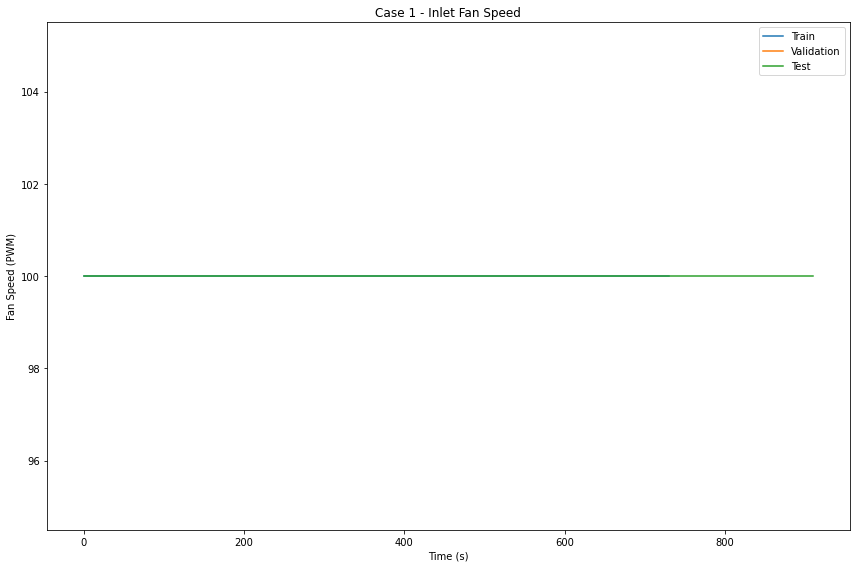

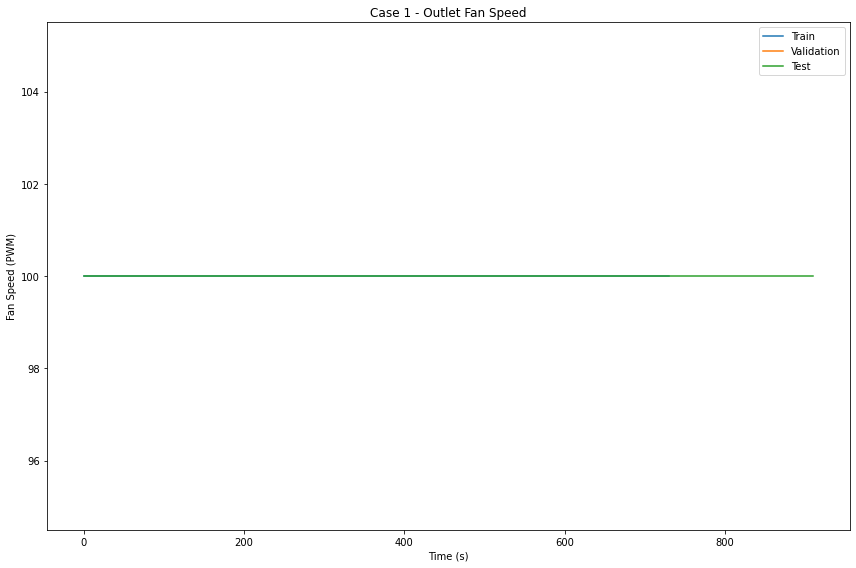

In [176]:
plot_fan_speed(case_df=case_1, id=1, is_inlet=True, test_size=1)
plot_fan_speed(case_df=case_1, id=1, is_inlet=False, test_size=1)

### Temperature

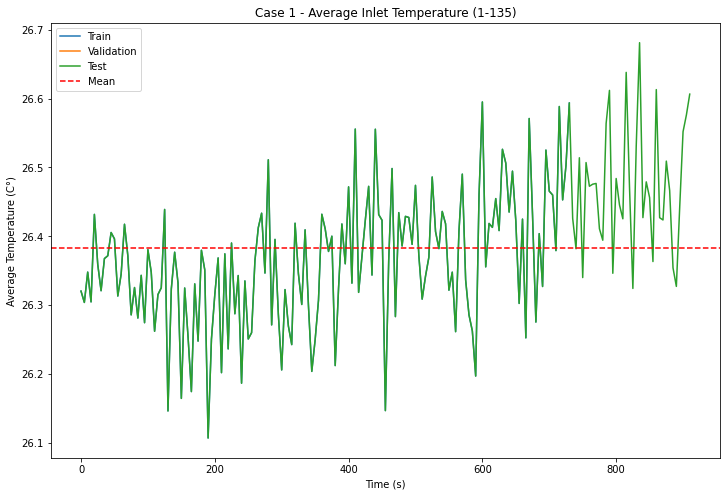

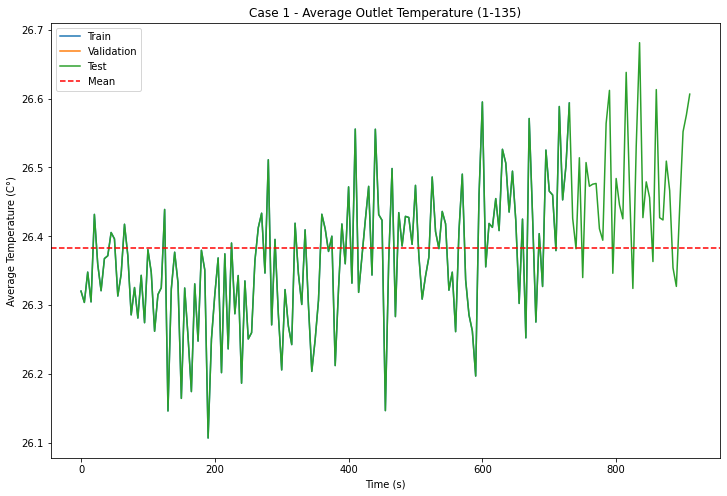

In [177]:
plot_temp(case_df=case_1, id=1, is_inlet=True, test_size=1)
plot_temp(case_df=case_1, id=1, is_inlet=False, test_size=1)

In [178]:
case_1 = normalize_datasets(case_1, outlet_temp_cols, inlet_temp_cols)

In [179]:
case_1.to_csv('../datasets/case_1.csv')

## Case 2

In [180]:
train_c2, test_c2, val_c2 = train_test_val_split(case_2, test_size=0)

### Fan Speed

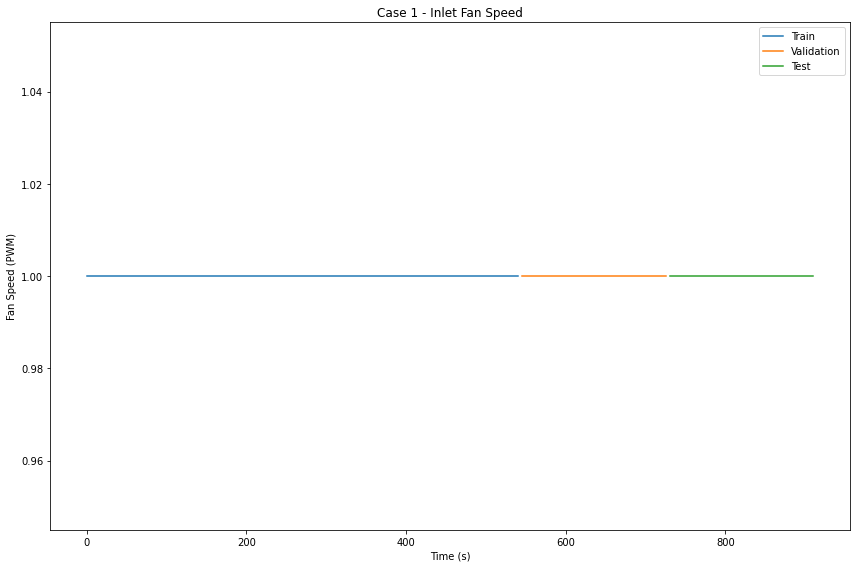

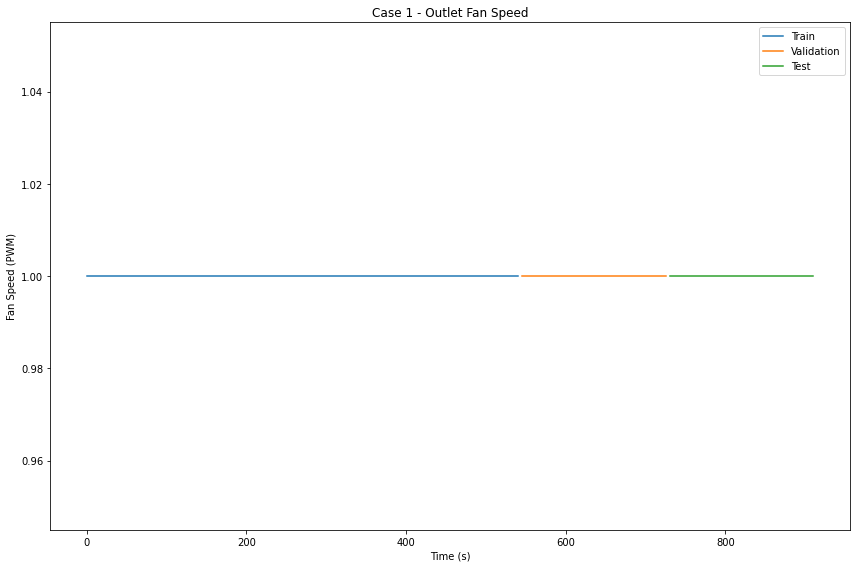

In [181]:
plot_fan_speed(case_df=case_2, id=1, is_inlet=True, test_size=0.2)
plot_fan_speed(case_df=case_2, id=1, is_inlet=False, test_size=0.2)

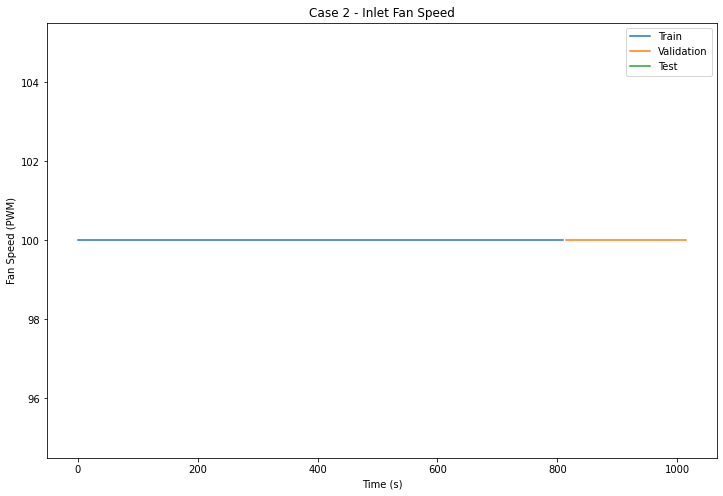

In [182]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["inlet_fan_speed"].plot(label="Train")
val_c2["inlet_fan_speed"].plot(label="Validation")
test_c2["inlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_fan_speed.jpg", dpi=300)

#### Outlets

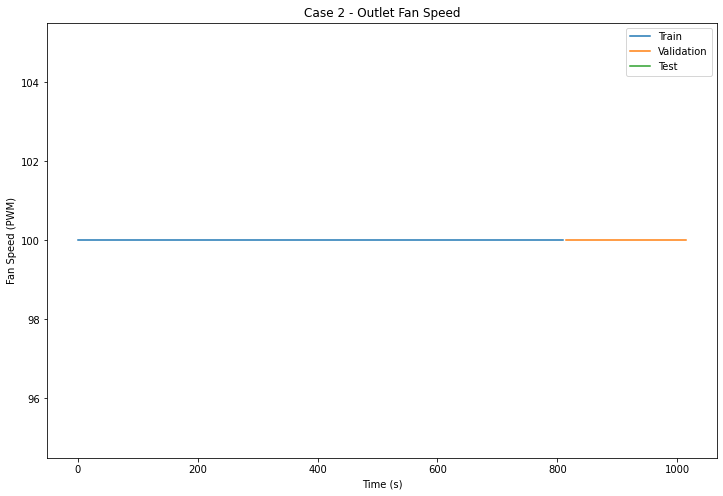

In [183]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2["outlet_fan_speed"].plot(label="Train")
val_c2["outlet_fan_speed"].plot(label="Validation")
test_c2["outlet_fan_speed"].plot(label="Test")

plt.title("Case 2 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_fan_speed.jpg", dpi=300)

### Temperature

#### Inlets

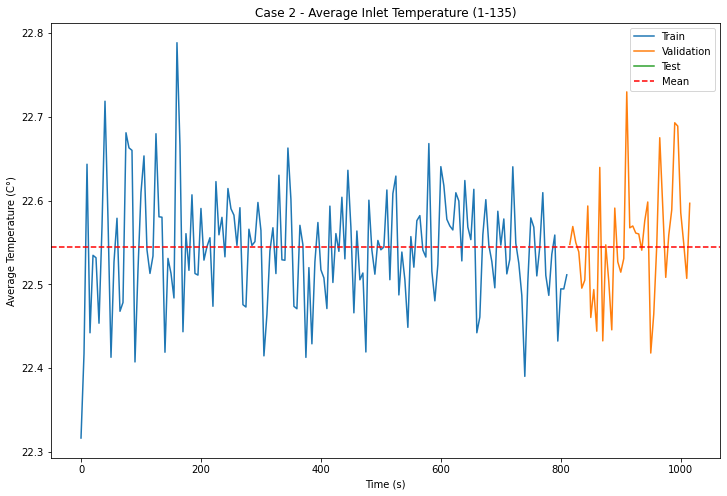

In [184]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c2[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c2[inlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_2[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 
plt.legend()

plt.savefig("../plots/preprocessing/case2_inlet_temp.jpg", dpi=300)

#### Outlets

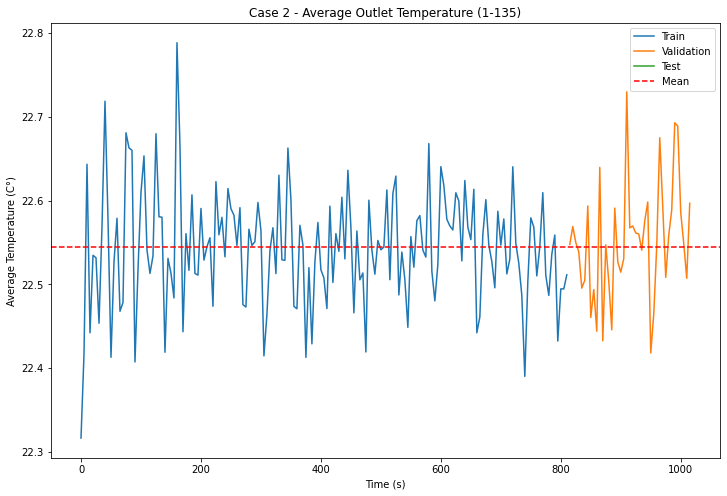

In [185]:
fig, ax = plt.subplots(figsize=(12,8))

train_c2[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c2[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c2[outlet_temp_cols].mean(axis=1).plot(label="Test")

mean = case_2[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.title("Case 2 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)") 

plt.legend()

plt.savefig("../plots/preprocessing/case2_outlet_temp.jpg", dpi=300)

In [186]:
case_2 = normalize_datasets(case_2, outlet_temp_cols, inlet_temp_cols)

In [187]:
case_2.to_csv('../datasets/case_2.csv')

## Case 3

In [188]:
train_c3, test_c3, val_c3 = train_test_val_split(case_3, test_size=0)

### Inlet Fan Speed

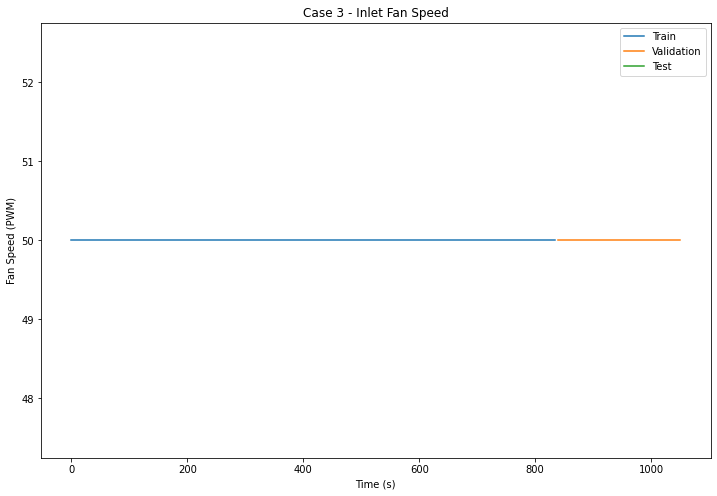

In [189]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["inlet_fan_speed"].plot(label="Train")
val_c3["inlet_fan_speed"].plot(label="Validation")
test_c3["inlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

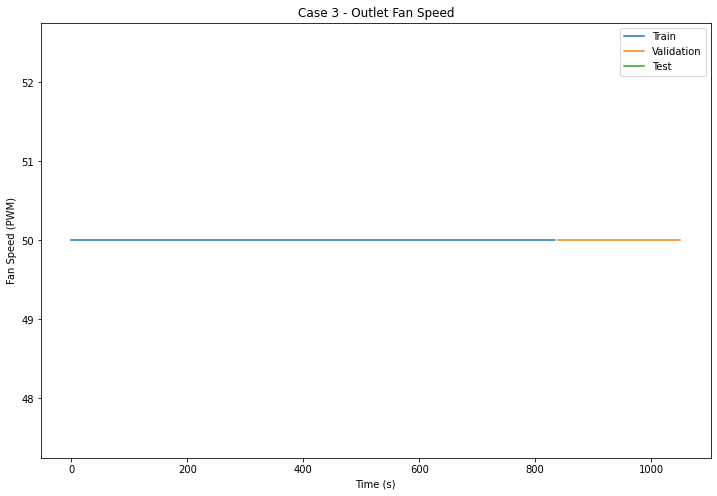

In [190]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3["outlet_fan_speed"].plot(label="Train")
val_c3["outlet_fan_speed"].plot(label="Validation")
test_c3["outlet_fan_speed"].plot(label="Test")

plt.title("Case 3 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

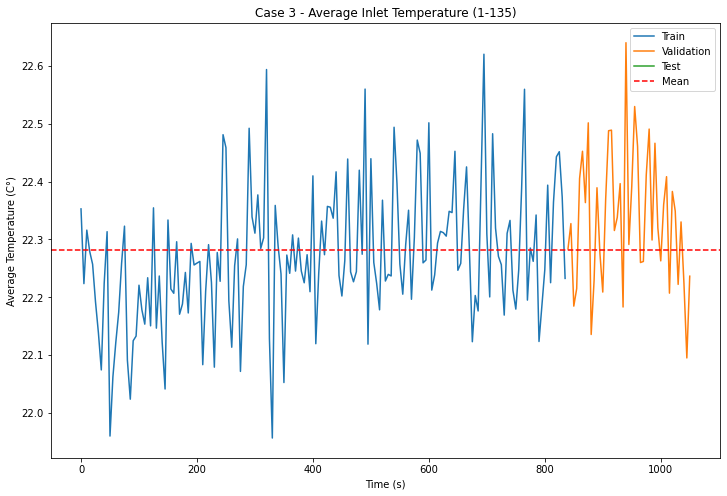

In [191]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c3[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c3[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 3 - Average Inlet Temperature (1-135)")
plt.ylabel("Average Temperature (C°)")
plt.xlabel("Time (s)")

mean = case_3[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

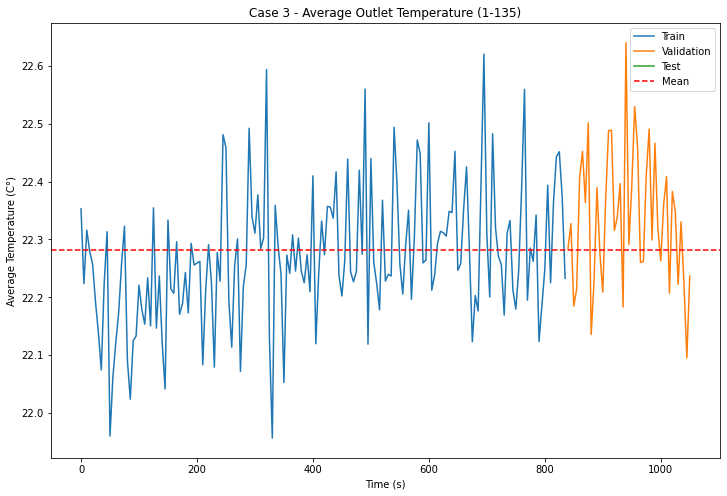

In [192]:
fig, ax = plt.subplots(figsize=(12,8))

train_c3[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c3[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c3[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 3 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_3[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case3_outlet_temp.jpg", dpi=300)

In [193]:
case_3 = normalize_datasets(case_3, outlet_temp_cols, inlet_temp_cols)

In [194]:
case_3.to_csv('../datasets/case_3.csv')

## Case 4

In [195]:
train_c4, test_c4, val_c4 = train_test_val_split(case_4, test_size=0)

### Inlet Fan Speed

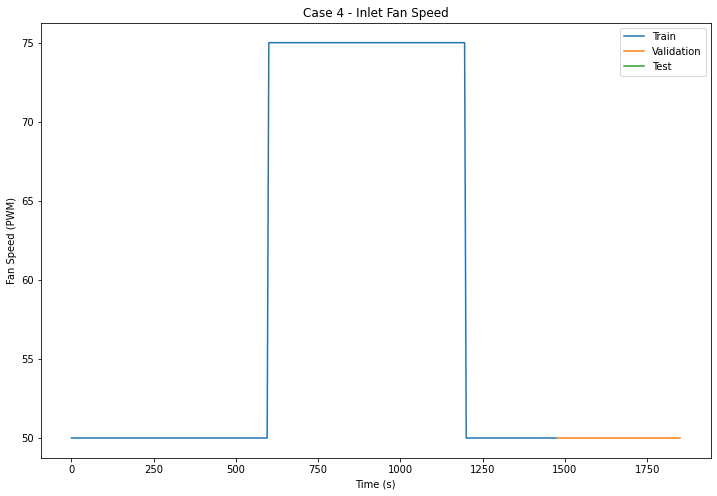

In [196]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["inlet_fan_speed"].plot(label="Train")
val_c4["inlet_fan_speed"].plot(label="Validation")
test_c4["inlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

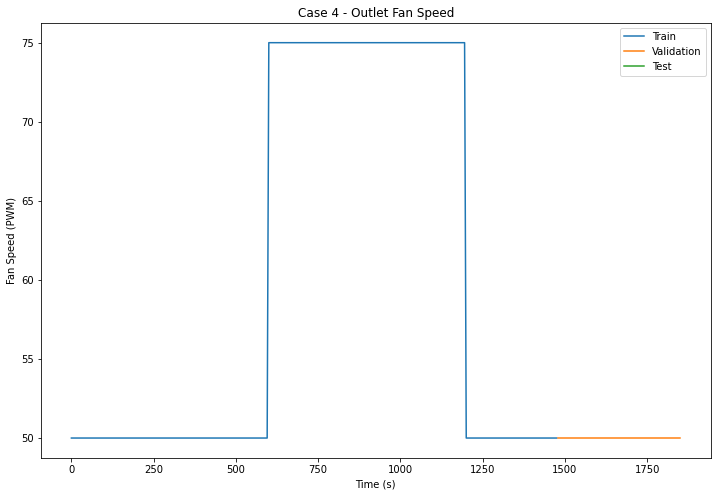

In [197]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4["outlet_fan_speed"].plot(label="Train")
val_c4["outlet_fan_speed"].plot(label="Validation")
test_c4["outlet_fan_speed"].plot(label="Test")

plt.title("Case 4 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperatures

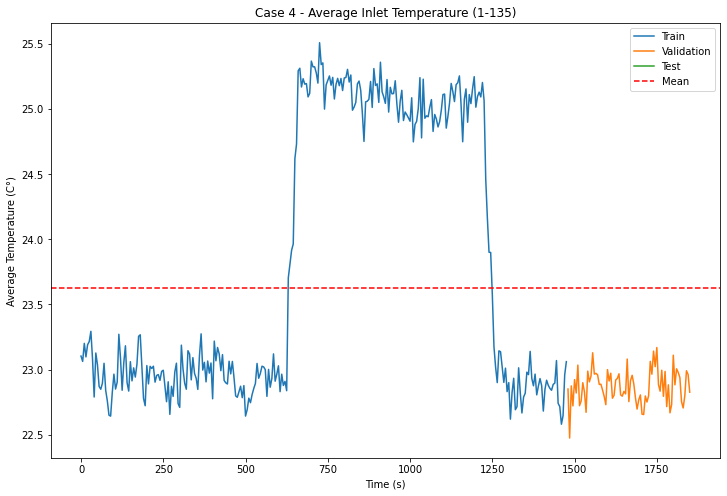

In [198]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c4[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c4[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 4 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_inlet_temp.jpg", dpi=300)

### Outlet Temperatures

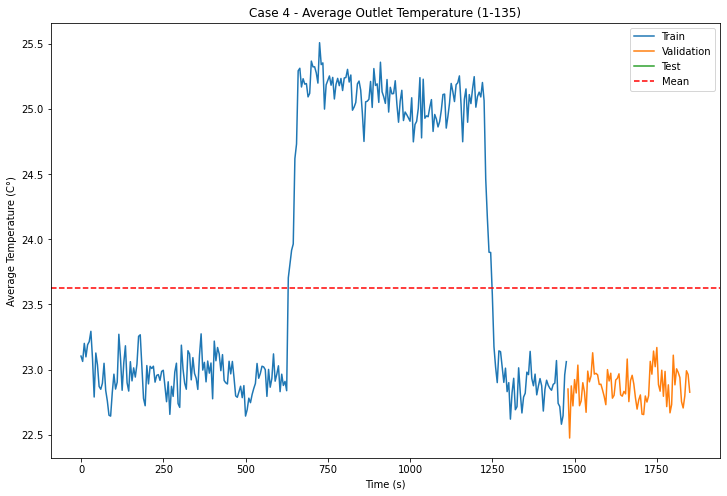

In [199]:
fig, ax = plt.subplots(figsize=(12,8))

train_c4[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c4[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c4[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 4 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_4[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case4_outlet_temp.jpg", dpi=300)

In [200]:
case_4 = normalize_datasets(case_4, outlet_temp_cols, inlet_temp_cols)

In [201]:
case_4.to_csv('../datasets/case_4.csv')

## Case 5

In [202]:
train_c5, test_c5, val_c5 = train_test_val_split(case_5, test_size=0)

### Inlet Fan Speed

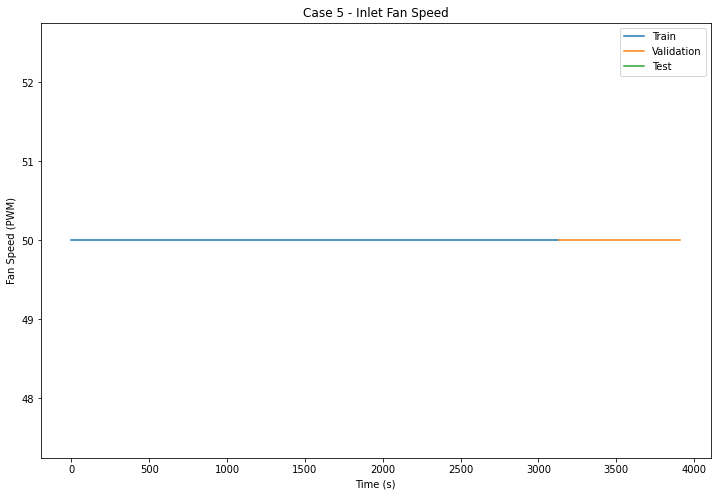

In [203]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["inlet_fan_speed"].plot(label="Train")
val_c5["inlet_fan_speed"].plot(label="Validation")
test_c5["inlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Inlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_fan_speed.jpg", dpi=300)

### Outlet Fan Speed

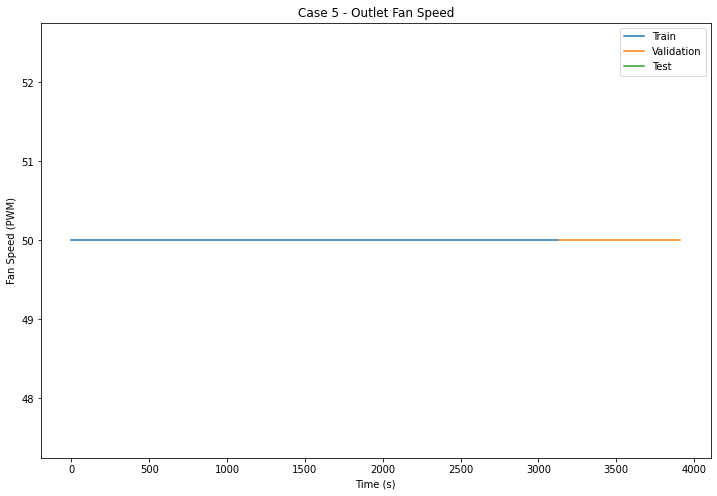

In [204]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5["outlet_fan_speed"].plot(label="Train")
val_c5["outlet_fan_speed"].plot(label="Validation")
test_c5["outlet_fan_speed"].plot(label="Test")

plt.title("Case 5 - Outlet Fan Speed")
plt.xlabel("Time (s)")
plt.ylabel("Fan Speed (PWM)")
plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_fan_speed.jpg", dpi=300)

### Inlet Temperature

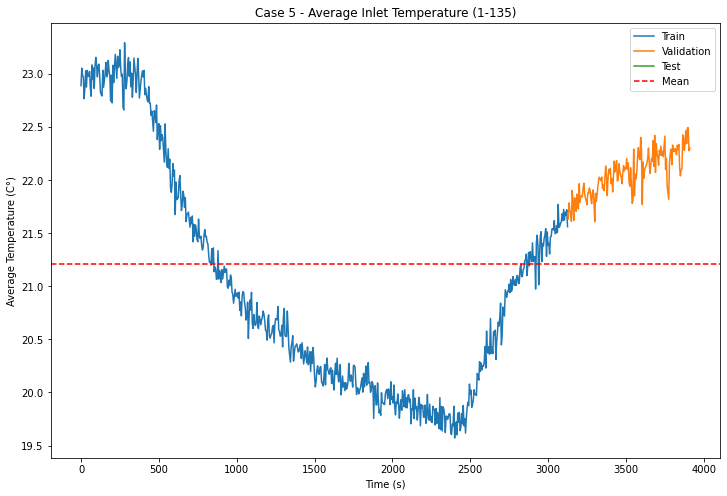

In [205]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[inlet_temp_cols].mean(axis=1).plot(label="Train")
val_c5[inlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c5[inlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 5 - Average Inlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[inlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_inlet_temp.jpg", dpi=300)

### Outlet Temperature

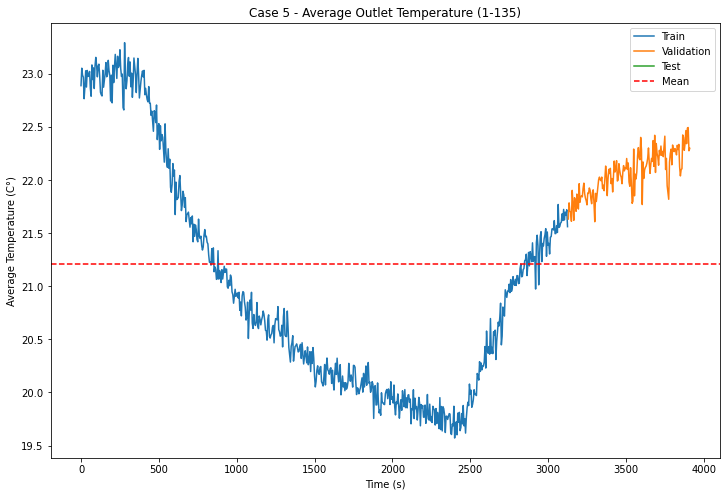

In [206]:
fig, ax = plt.subplots(figsize=(12,8))

train_c5[outlet_temp_cols].mean(axis=1).plot(label="Train")
val_c5[outlet_temp_cols].mean(axis=1).plot(label="Validation")
test_c5[outlet_temp_cols].mean(axis=1).plot(label="Test")

plt.title("Case 5 - Average Outlet Temperature (1-135)")
plt.xlabel("Time (s)")
plt.ylabel("Average Temperature (C°)")

mean = case_5[outlet_temp_cols].mean().mean()
plt.axhline(mean, color='r', linestyle='dashed', label='Mean')
# ax.text(0, mean+0.05, "{:.2f}".format(mean), color='r')

plt.legend()

plt.savefig("../plots/preprocessing/case5_outlet_temp.jpg", dpi=300)

In [207]:
case_5 = normalize_datasets(case_5, outlet_temp_cols, inlet_temp_cols)

In [208]:
case_5.to_csv('../datasets/case_5.csv')